In [1]:
pip install geopandas shapely


   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------------- -------------------------- 112.6/323.6 kB 3.2 MB/s eta 0:00:01
   ----------------------------- ---------- 235.5/323.6 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.4 MB 7.0 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 6.0 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 6.3 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.4 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------

In [2]:
#CREATE SHAPEFILE
import geopandas as gpd
from shapely.geometry import Polygon

# Define the coordinates for the bounding box
coordinates = [
    (71.84239284757645, 16.121391375583922),  # Bottom-left
    (72.28917007956774, 16.121391375583922),  # Bottom-right
    (72.28917007956774, 16.703666850027954),  # Top-right
    (71.84239284757645, 16.703666850027954),  # Top-left
    (71.84239284757645, 16.121391375583922)   # Closing the polygon
]

# Create a polygon from the coordinates
polygon = Polygon(coordinates)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'id': [1]}, geometry=[polygon], crs="EPSG:4326")  # WGS84

# Save as a shapefile
shapefile_path = "bounding_box.shp"
gdf.to_file(shapefile_path)

print(f"Shapefile saved as {shapefile_path}")


Shapefile saved as bounding_box.shp


In [5]:
#SHAPE FILE TO GEOJSON
import geopandas as gpd
from shapely.geometry import Polygon

# Define the coordinates for the bounding box
coordinates = [
    (71.84239284757645, 16.121391375583922),  # Bottom-left
    (72.28917007956774, 16.121391375583922),  # Bottom-right
    (72.28917007956774, 16.703666850027954),  # Top-right
    (71.84239284757645, 16.703666850027954),  # Top-left
    (71.84239284757645, 16.121391375583922)   # Closing the polygon
]

# Create a polygon from the coordinates
polygon = Polygon(coordinates)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'id': [1]}, geometry=[polygon], crs="EPSG:4326")  # WGS84

# Save as a shapefile
shapefile_path = "bounding_box.shp"
gdf.to_file(shapefile_path)

print(f"Shapefile saved as {shapefile_path}")

# Convert to GeoJSON
geojson_path = "bounding_box.geojson"
gdf.to_file(geojson_path, driver="GeoJSON")

print(f"GeoJSON saved as {geojson_path}")


Shapefile saved as bounding_box.shp
GeoJSON saved as bounding_box.geojson


In [7]:
# STRUCTURE OF A CSV
import pandas as pd

# Path to your CSV file
csv_file = "photon_2019-03-13_t1141_1736231349334.csv"

# Read the CSV file
df = pd.read_csv(csv_file)

# Display the structure of the CSV
print("Columns and Data Types:")
print(df.dtypes)

print("\nFirst 5 Rows of the Data:")
print(df.head())

print("\nNumber of Rows and Columns:")
print(df.shape)


Columns and Data Types:
beam                object
latitude           float64
longitude          float64
photon height      float64
confidence code      int64
dtype: object

First 5 Rows of the Data:
   beam   latitude  longitude  photon height  confidence code
0  gt3l  16.121404  72.232104     -79.601974                2
1  gt3l  16.121461  72.232098     -79.608925                2
2  gt3l  16.121596  72.232085     -80.436028                2
3  gt3l  16.121667  72.232078     -80.171013                2
4  gt3l  16.121737  72.232071     -79.896912                2

Number of Rows and Columns:
(10242, 5)


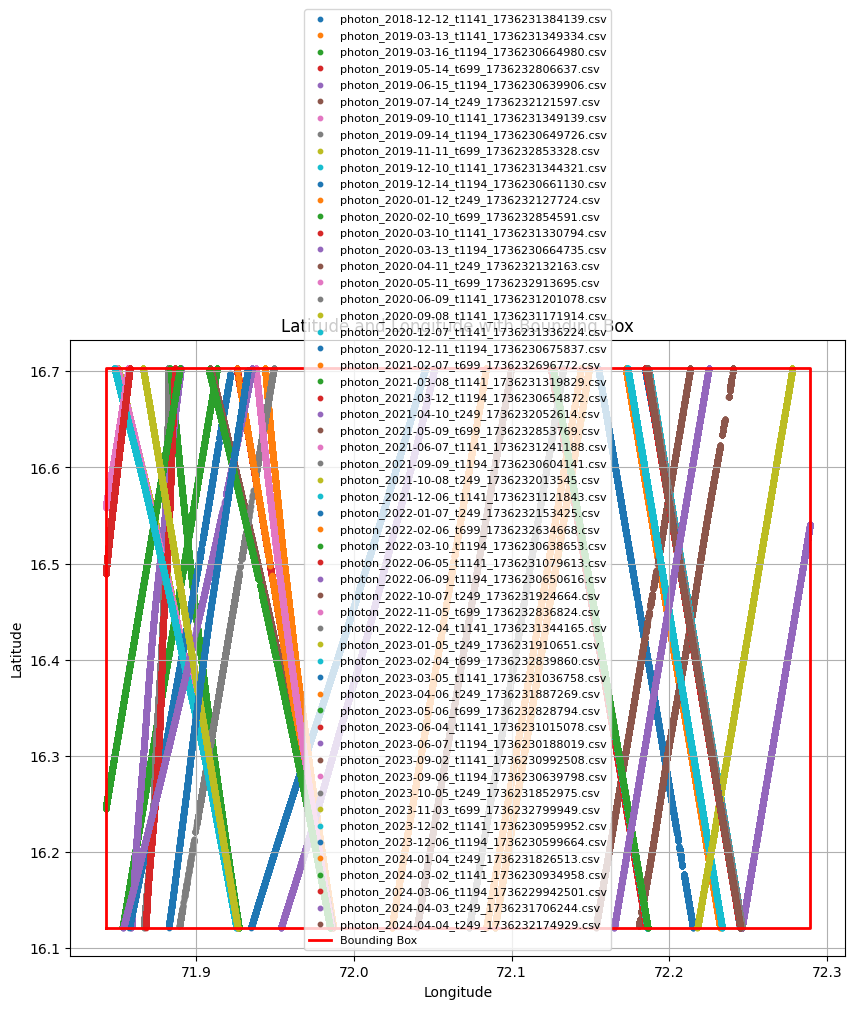

In [13]:
# LAT VS LONG PLOT FOR CSVS
import pandas as pd
import matplotlib.pyplot as plt
import os
from shapely.geometry import Polygon

# Folder containing the CSV files
folder_path = r"C:\Users\Lenovo\CSIR NIO"

# Define the bounding box coordinates
bounding_box_coords = [
    (71.84239284757645, 16.121391375583922),  # Bottom-left
    (72.28917007956774, 16.121391375583922),  # Bottom-right
    (72.28917007956774, 16.703666850027954),  # Top-right
    (71.84239284757645, 16.703666850027954),  # Top-left
    (71.84239284757645, 16.121391375583922)   # Closing the polygon
]

# Create a polygon for the bounding box
polygon = Polygon(bounding_box_coords)
x, y = polygon.exterior.xy  # Extract the x and y coordinates for plotting

# Initialize the plot
plt.figure(figsize=(10, 8))

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Ensure the required columns exist
        if 'latitude' in df.columns and 'longitude' in df.columns:
            plt.scatter(df['longitude'], df['latitude'], s=10, label=file_name)

# Plot the bounding box
plt.plot(x, y, color='red', label="Bounding Box", linewidth=2)

# Customize the plot
plt.title("Latitude and Longitude with Bounding Box")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="best", fontsize=8)
plt.grid(True)

# Show the plot
plt.show()



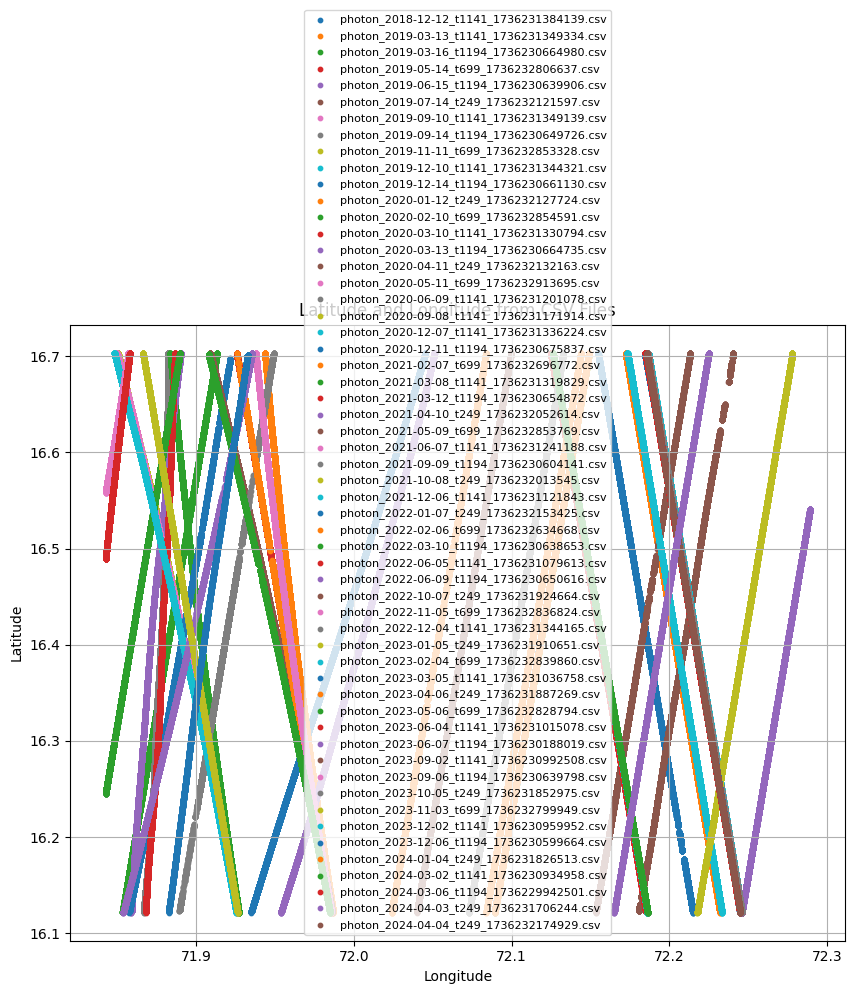

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Folder containing the CSV files
folder_path = r"C:\Users\Lenovo\CSIR NIO"  # Use raw string

# Initialize a plot
plt.figure(figsize=(10, 8))

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Ensure the required columns exist
        if 'latitude' in df.columns and 'longitude' in df.columns:
            plt.scatter(df['longitude'], df['latitude'], s=10, label=file_name)

# Customize the plot
plt.title("Latitude and Longitude from CSV Files")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="best", fontsize=8)
plt.grid(True)

# Show the plot
plt.show()


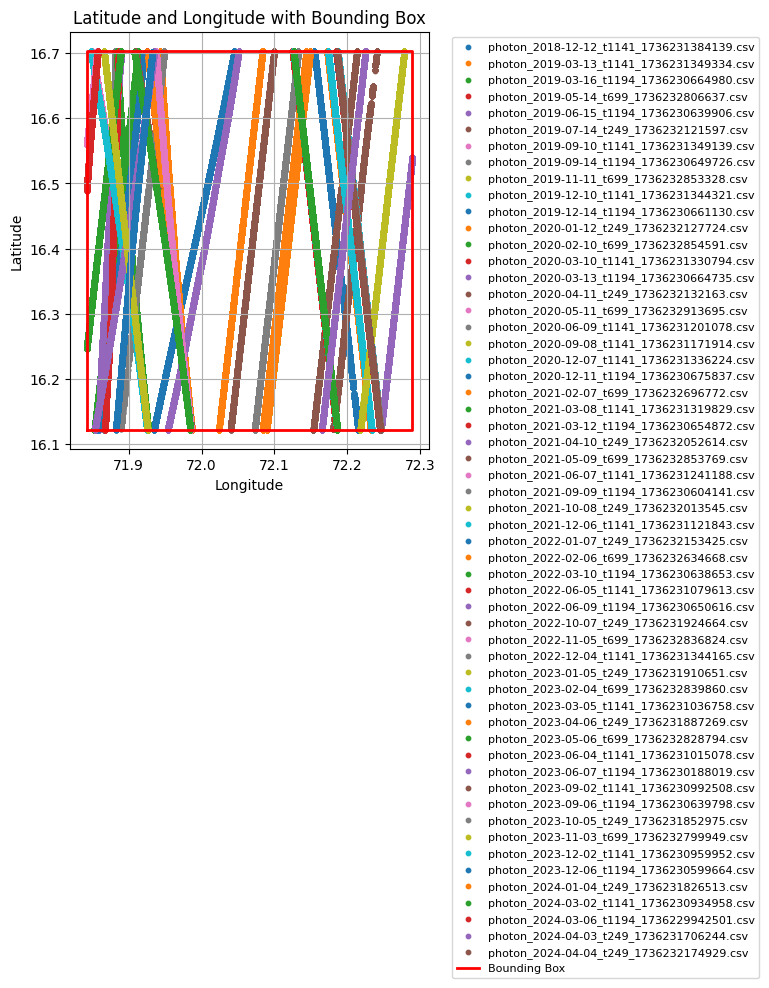

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from shapely.geometry import Polygon

# Folder containing the CSV files
folder_path = r"C:\Users\Lenovo\CSIR NIO"

# Define the bounding box coordinates
bounding_box_coords = [
    (71.84239284757645, 16.121391375583922),  # Bottom-left
    (72.28917007956774, 16.121391375583922),  # Bottom-right
    (72.28917007956774, 16.703666850027954),  # Top-right
    (71.84239284757645, 16.703666850027954),  # Top-left
    (71.84239284757645, 16.121391375583922)   # Closing the polygon
]

# Create a polygon for the bounding box
polygon = Polygon(bounding_box_coords)
x, y = polygon.exterior.xy  # Extract the x and y coordinates for plotting

# Initialize the plot
plt.figure(figsize=(10, 8))

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Ensure the required columns exist
        if 'latitude' in df.columns and 'longitude' in df.columns:
            plt.scatter(df['longitude'], df['latitude'], s=10, label=file_name)

# Plot the bounding box
plt.plot(x, y, color='red', label="Bounding Box", linewidth=2)

# Customize the plot
plt.title("Latitude and Longitude with Bounding Box")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Place the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=8)

# Adjust layout to fit legend
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right for the legend

# Show the plot
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20424\3985971885.py:56: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=8)


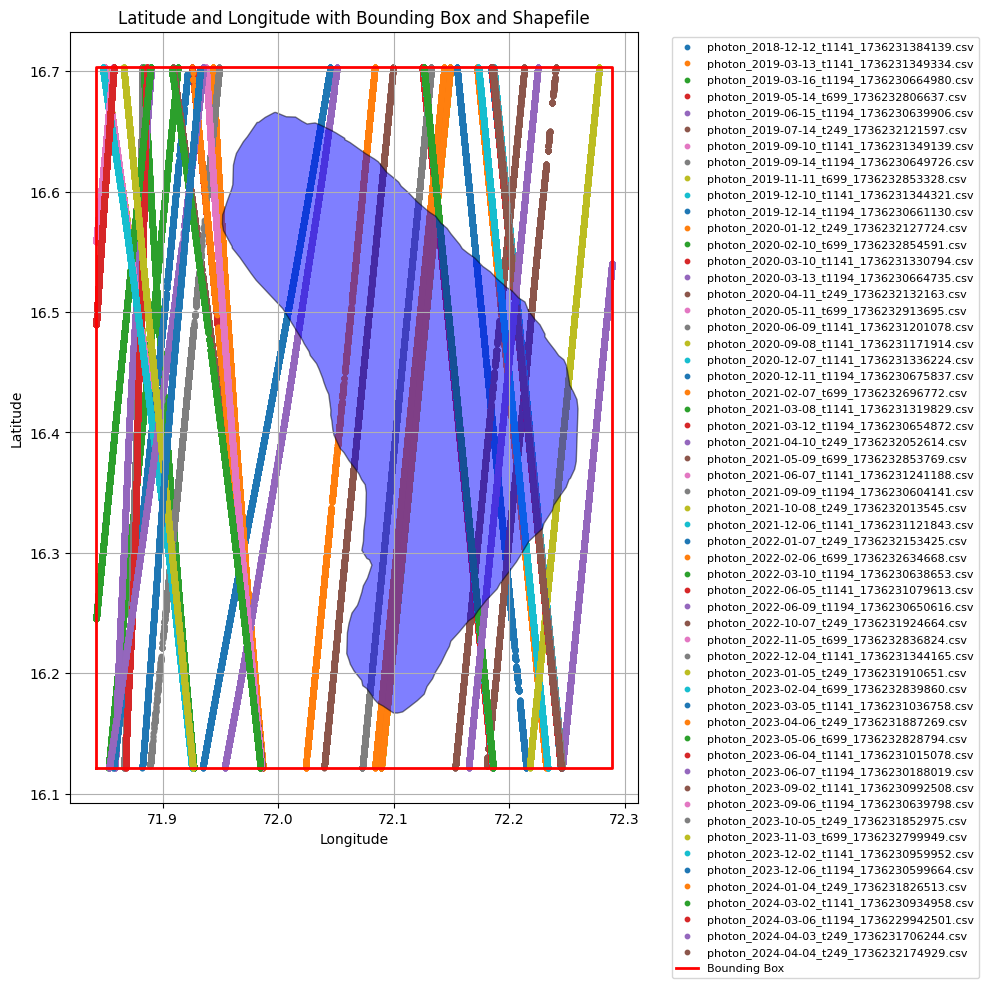

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gpd
from shapely.geometry import Polygon

# Folder containing the CSV files
folder_path = r"C:\Users\Lenovo\CSIR NIO"

# Shapefile path (update this path as per your shapefile location)
shapefile_path = r"C:\Users\Lenovo\CSIR NIO\final plateu.geojson"

# Define the bounding box coordinates
bounding_box_coords = [
    (71.84239284757645, 16.121391375583922),  # Bottom-left
    (72.28917007956774, 16.121391375583922),  # Bottom-right
    (72.28917007956774, 16.703666850027954),  # Top-right
    (71.84239284757645, 16.703666850027954),  # Top-left
    (71.84239284757645, 16.121391375583922)   # Closing the polygon
]

# Create a polygon for the bounding box
polygon = Polygon(bounding_box_coords)
x, y = polygon.exterior.xy  # Extract the x and y coordinates for plotting

# Initialize the plot
plt.figure(figsize=(12, 10))

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Ensure the required columns exist
        if 'latitude' in df.columns and 'longitude' in df.columns:
            plt.scatter(df['longitude'], df['latitude'], s=10, label=file_name)

# Plot the bounding box
plt.plot(x, y, color='red', label="Bounding Box", linewidth=2)

# Load and plot the shapefile
if os.path.exists(shapefile_path):
    gdf = gpd.read_file(shapefile_path)
    gdf.plot(ax=plt.gca(), color='blue', edgecolor='black', alpha=0.5, label="Shapefile Region")

# Customize the plot
plt.title("Latitude and Longitude with Bounding Box and Shapefile")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Place the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=8)

# Adjust layout to fit legend
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right for the legend

# Show the plot
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20424\3546239927.py:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geojson_union = geojson_data.geometry.unary_union
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20424\3546239927.py:52: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=8)


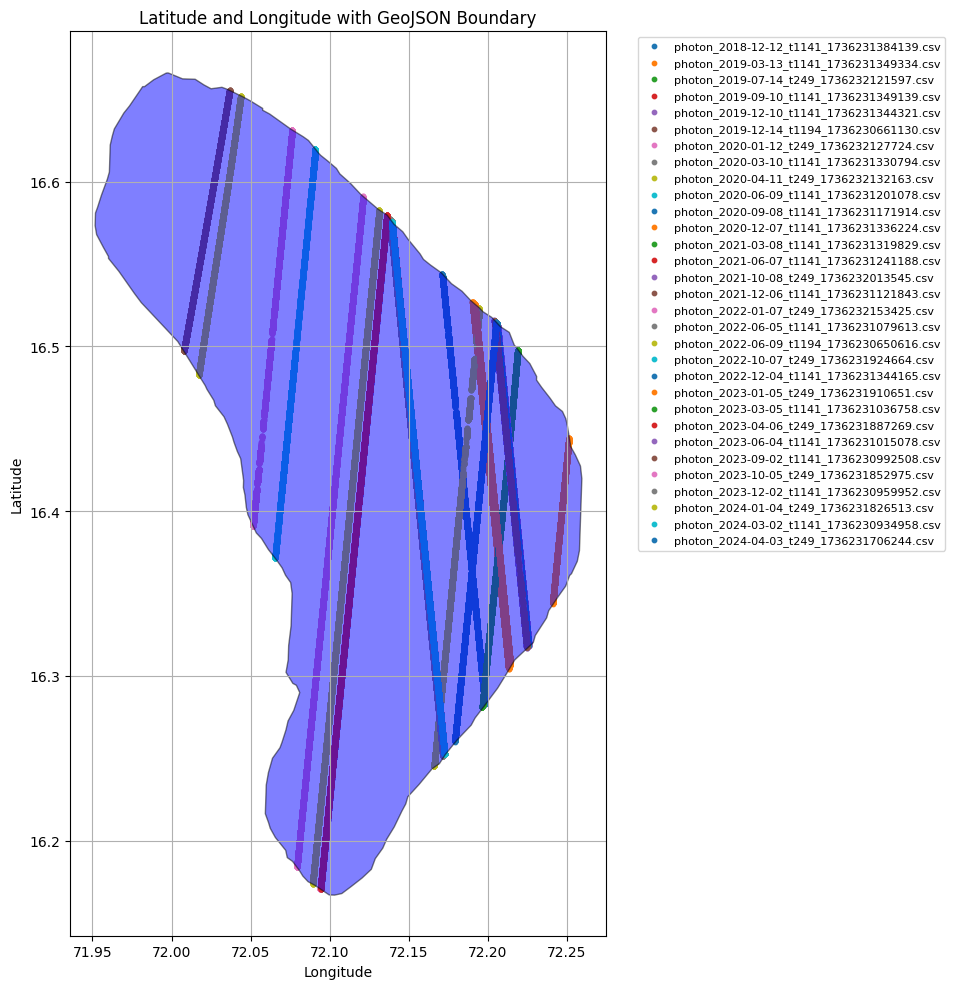

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gpd
from shapely.geometry import Point

# Folder containing the CSV files
folder_path = r"C:\Users\Lenovo\CSIR NIO"

# GeoJSON file path
geojson_path = r"C:\Users\Lenovo\CSIR NIO\final plateu.geojson"

# Load the GeoJSON file
geojson_data = gpd.read_file(geojson_path)

# Use union_all() method to combine geometries in GeoJSON
geojson_union = geojson_data.geometry.unary_union

# Initialize the plot
plt.figure(figsize=(12, 10))

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Ensure the required columns exist
        if 'latitude' in df.columns and 'longitude' in df.columns:
            # Convert the dataframe to a GeoDataFrame of points
            points = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_xy(df['longitude'], df['latitude']))

            # Check which points are inside the GeoJSON region using union_all()
            points_in_geojson = points[points.geometry.within(geojson_union)]

            # If there are points inside the GeoJSON, plot them
            if not points_in_geojson.empty:
                plt.scatter(points_in_geojson['longitude'], points_in_geojson['latitude'], s=10, label=file_name)

# Plot the GeoJSON boundary
geojson_data.plot(ax=plt.gca(), color='blue', edgecolor='black', alpha=0.5, label="GeoJSON Region")

# Customize the plot
plt.title("Latitude and Longitude with GeoJSON Boundary")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Place the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=8)

# Adjust layout to fit legend
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right for the legend

# Show the plot
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20424\3546239927.py:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geojson_union = geojson_data.geometry.unary_union
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20424\3546239927.py:52: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=8)


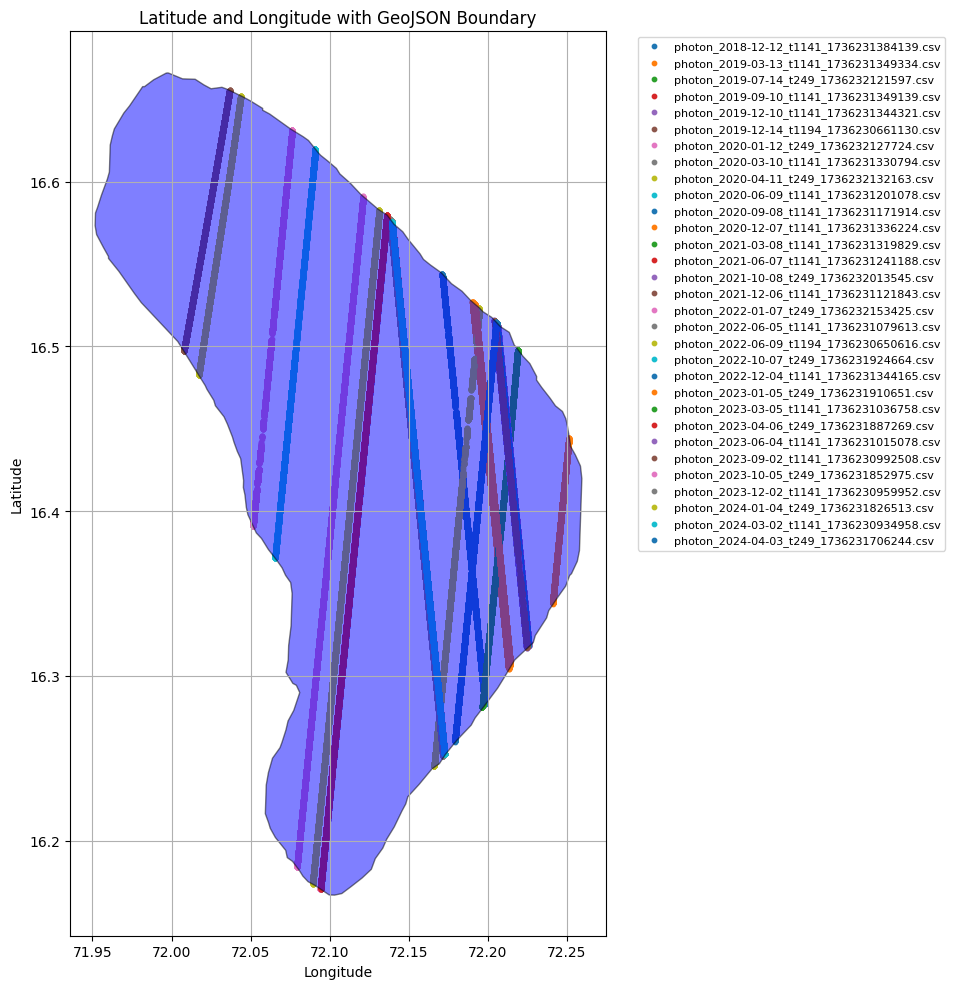

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gpd
from shapely.geometry import Point

# Folder containing the CSV files
folder_path = r"C:\Users\Lenovo\CSIR NIO"

# GeoJSON file path
geojson_path = r"C:\Users\Lenovo\CSIR NIO\final plateu.geojson"

# Load the GeoJSON file
geojson_data = gpd.read_file(geojson_path)

# Use union_all() method to combine geometries in GeoJSON
geojson_union = geojson_data.geometry.unary_union

# Initialize the plot
plt.figure(figsize=(12, 10))

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Ensure the required columns exist
        if 'latitude' in df.columns and 'longitude' in df.columns:
            # Convert the dataframe to a GeoDataFrame of points
            points = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_xy(df['longitude'], df['latitude']))

            # Check which points are inside the GeoJSON region using union_all()
            points_in_geojson = points[points.geometry.within(geojson_union)]

            # If there are points inside the GeoJSON, plot them
            if not points_in_geojson.empty:
                plt.scatter(points_in_geojson['longitude'], points_in_geojson['latitude'], s=10, label=file_name)

# Plot the GeoJSON boundary
geojson_data.plot(ax=plt.gca(), color='blue', edgecolor='black', alpha=0.5, label="GeoJSON Region")

# Customize the plot
plt.title("Latitude and Longitude with GeoJSON Boundary")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Place the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=8)

# Adjust layout to fit legend
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right for the legend

# Show the plot
plt.show()


In [32]:
import pandas as pd
import os
import geopandas as gpd
from shapely.geometry import Point

# Folder containing the CSV files
folder_path = r"C:\Users\Lenovo\CSIR NIO"

# GeoJSON file path
geojson_path = r"C:\Users\Lenovo\CSIR NIO\final plateu.geojson"

# Load the GeoJSON file
geojson_data = gpd.read_file(geojson_path)

# Use union_all() method to combine geometries in GeoJSON
geojson_union = geojson_data.geometry.unary_union

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Ensure the required columns exist
        if 'latitude' in df.columns and 'longitude' in df.columns:
            # Convert the dataframe to a GeoDataFrame of points
            points = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_xy(df['longitude'], df['latitude']))

            # Check which points are inside the GeoJSON region using union_all()
            points_in_geojson = points[points.geometry.within(geojson_union)]

            # If there are points inside the GeoJSON, save them to a new CSV
            if not points_in_geojson.empty:
                # Get the rows that match the filtered points
                filtered_data = df.loc[points_in_geojson.index]
                
                # Define the output path for the filtered CSV file
                output_path = os.path.join(folder_path, f"filtered_{file_name}")
                
                # Save the filtered data to a new CSV file
                filtered_data.to_csv(output_path, index=False)

                print(f"Saved filtered data for {file_name} to {output_path}")


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20424\53436054.py:16: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geojson_union = geojson_data.geometry.unary_union


Saved filtered data for photon_2018-12-12_t1141_1736231384139.csv to C:\Users\Lenovo\CSIR NIO\filtered_photon_2018-12-12_t1141_1736231384139.csv
Saved filtered data for photon_2019-03-13_t1141_1736231349334.csv to C:\Users\Lenovo\CSIR NIO\filtered_photon_2019-03-13_t1141_1736231349334.csv
Saved filtered data for photon_2019-07-14_t249_1736232121597.csv to C:\Users\Lenovo\CSIR NIO\filtered_photon_2019-07-14_t249_1736232121597.csv
Saved filtered data for photon_2019-09-10_t1141_1736231349139.csv to C:\Users\Lenovo\CSIR NIO\filtered_photon_2019-09-10_t1141_1736231349139.csv
Saved filtered data for photon_2019-12-10_t1141_1736231344321.csv to C:\Users\Lenovo\CSIR NIO\filtered_photon_2019-12-10_t1141_1736231344321.csv
Saved filtered data for photon_2019-12-14_t1194_1736230661130.csv to C:\Users\Lenovo\CSIR NIO\filtered_photon_2019-12-14_t1194_1736230661130.csv
Saved filtered data for photon_2020-01-12_t249_1736232127724.csv to C:\Users\Lenovo\CSIR NIO\filtered_photon_2020-01-12_t249_1736232

KeyboardInterrupt: 

In [34]:
import pandas as pd
import os
import geopandas as gpd
from shapely.geometry import Point
dd
# Folder containing the CSV files
folder_path = r"C:\Users\Lenovo\CSIR NIO"

# GeoJSON file path
geojson_path = r"C:\Users\Lenovo\CSIR NIO\final plateu.geojson"

# Load the GeoJSON file
geojson_data = gpd.read_file(geojson_path)

# Use union_all() method to combine geometries in GeoJSON
geojson_union = geojson_data.geometry.unary_union

# Create an empty list to store filtered data
all_filtered_data = []

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Ensure the required columns exist
        if 'latitude' in df.columns and 'longitude' in df.columns:
            # Convert the dataframe to a GeoDataFrame of points
            points = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_xy(df['longitude'], df['latitude']))

            # Check which points are inside the GeoJSON region using union_all()
            points_in_geojson = points[points.geometry.within(geojson_union)]

            # If there are points inside the GeoJSON, append them to the list
            if not points_in_geojson.empty:
                all_filtered_data.append(df.loc[points_in_geojson.index])

# Combine all the filtered data into a single DataFrame
final_filtered_data = pd.concat(all_filtered_data, ignore_index=True)

# Define the output path for the combined CSV file
output_path = os.path.join(folder_path, "combined_filtered_data.csv")

# Save the combined filtered data to a new CSV file
final_filtered_data.to_csv(output_path, index=False)

print(f"Saved all filtered data to {output_path}")


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20424\4287982103.py:16: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geojson_union = geojson_data.geometry.unary_union


Saved all filtered data to C:\Users\Lenovo\CSIR NIO\combined_filtered_data.csv


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the combined filtered data CSV file
combined_data_path = r"C:\Users\Lenovo\CSIR NIO\combined_filtered_data.csv"
df = pd.read_csv(combined_data_path)

# Make sure the required columns exist
if 'latitude' in df.columns and 'longitude' in df.columns and 'photon height' in df.columns:
    
    # Plot 1: Lat vs Long (Scatter plot)
    plt.figure(figsize=(8, 6))
    plt.scatter(df['latitude'], df['longitude'], c='blue', s=1)
    plt.title('Latitude vs Longitude')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.grid(True)
    lat_long_path = r"C:\Users\Lenovo\CSIR NIO\lat_vs_long.png"
    plt.savefig(lat_long_path)
    plt.close()
    print(f"Saved Lat vs Long plot to {lat_long_path}")
    
    # Plot 2: Lat vs Photon Height (Scatter plot)
    plt.figure(figsize=(8, 6))
    plt.scatter(df['latitude'], df['photon height'], c='green', s=1)
    plt.title('Latitude vs Photon Height')
    plt.xlabel('Latitude')
    plt.ylabel('Photon Height')
    plt.grid(True)
    lat_photon_path = r"C:\Users\Lenovo\CSIR NIO\lat_vs_photon.png"
    plt.savefig(lat_photon_path)
    plt.close()
    print(f"Saved Lat vs Photon Height plot to {lat_photon_path}")
    
    # Plot 3: Long vs Photon Height (Scatter plot)
    plt.figure(figsize=(8, 6))
    plt.scatter(df['longitude'], df['photon height'], c='red', s=1)
    plt.title('Longitude vs Photon Height')
    plt.xlabel('Longitude')
    plt.ylabel('Photon Height')
    plt.grid(True)
    long_photon_path = r"C:\Users\Lenovo\CSIR NIO\long_vs_photon.png"
    plt.savefig(long_photon_path)
    plt.close()
    print(f"Saved Long vs Photon Height plot to {long_photon_path}")
    
    # Plot 4: 3D Plot of Lat, Long, and Photon Height
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['latitude'], df['longitude'], df['photon height'], c='purple', s=1)
    ax.set_title('3D Plot of Latitude, Longitude, and Photon Height')
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.set_zlabel('Photon Height')
    plt.tight_layout()
    three_d_path = r"C:\Users\Lenovo\CSIR NIO\3d_lat_long_photon.png"
    plt.savefig(three_d_path)
    plt.close()
    print(f"Saved 3D plot to {three_d_path}")
    
else:
    print("Required columns ('latitude', 'longitude', 'photon height') not found in the data.")


Saved Lat vs Long plot to C:\Users\Lenovo\CSIR NIO\lat_vs_long.png
Saved Lat vs Photon Height plot to C:\Users\Lenovo\CSIR NIO\lat_vs_photon.png
Saved Long vs Photon Height plot to C:\Users\Lenovo\CSIR NIO\long_vs_photon.png
Saved 3D plot to C:\Users\Lenovo\CSIR NIO\3d_lat_long_photon.png


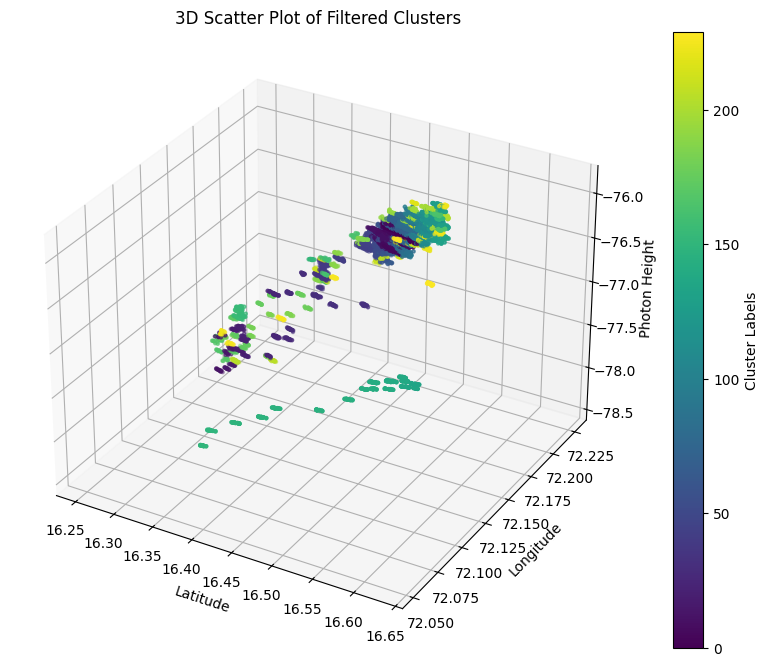

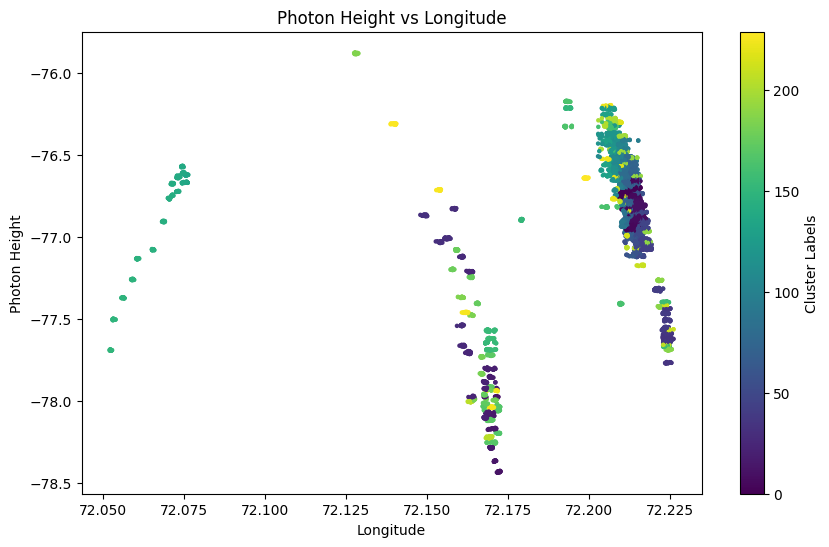

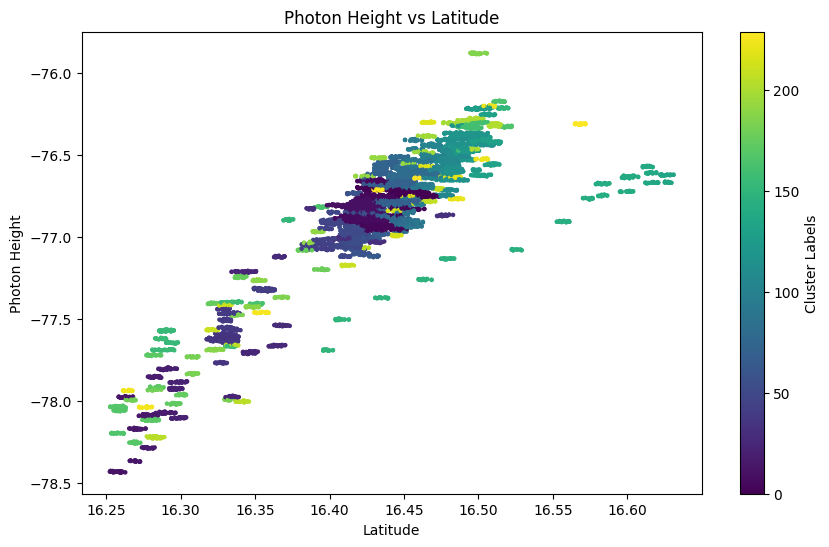

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

# Load the data
file_path = r"C:\Users\Lenovo\CSIR NIO\combined_filtered_data.csv"
data = pd.read_csv(file_path)

# Extract relevant data
photon_height = data["photon height"]
latitude = data["latitude"]
longitude = data["longitude"]

# Prepare the data for clustering
coords = np.array(list(zip(latitude, longitude, photon_height)))

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.005, min_samples=20)  # Adjust eps and min_samples for tighter clusters
labels = dbscan.fit_predict(coords)

# Filter out noise (label == -1)
filtered_data = coords[labels != -1]
filtered_lat = filtered_data[:, 0]
filtered_lon = filtered_data[:, 1]
filtered_height = filtered_data[:, 2]

# Plot 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(filtered_lat, filtered_lon, filtered_height, c=labels[labels != -1], cmap='viridis', s=5)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Photon Height")
ax.set_title("3D Scatter Plot of Filtered Clusters")
plt.colorbar(scatter, ax=ax, label="Cluster Labels")
plt.show()

# Plot Photon Height vs Longitude
plt.figure(figsize=(10, 6))
plt.scatter(filtered_lon, filtered_height, c=labels[labels != -1], cmap='viridis', s=5)
plt.xlabel("Longitude")
plt.ylabel("Photon Height")
plt.title("Photon Height vs Longitude")
plt.colorbar(label="Cluster Labels")
plt.show()

# Plot Photon Height vs Latitude
plt.figure(figsize=(10, 6))
plt.scatter(filtered_lat, filtered_height, c=labels[labels != -1], cmap='viridis', s=5)
plt.xlabel("Latitude")
plt.ylabel("Photon Height")
plt.title("Photon Height vs Latitude")
plt.colorbar(label="Cluster Labels")
plt.show()


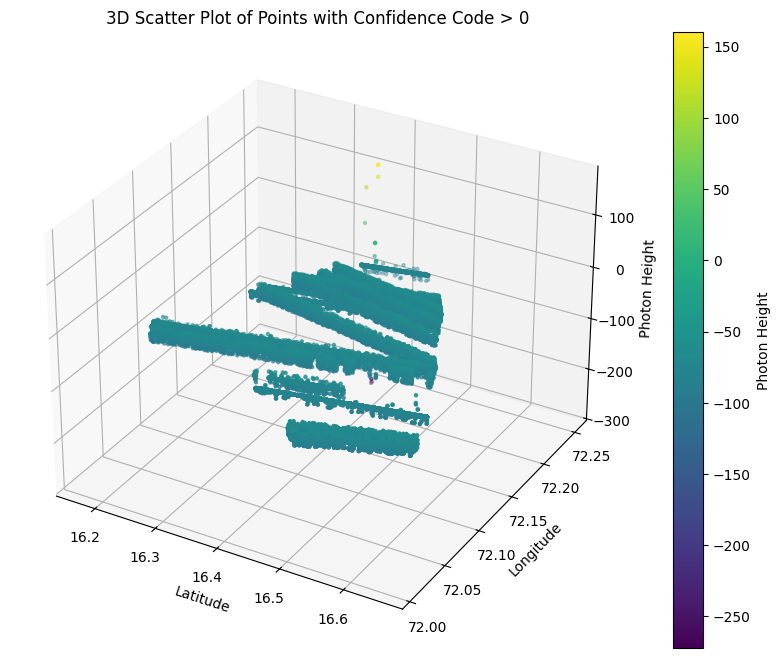

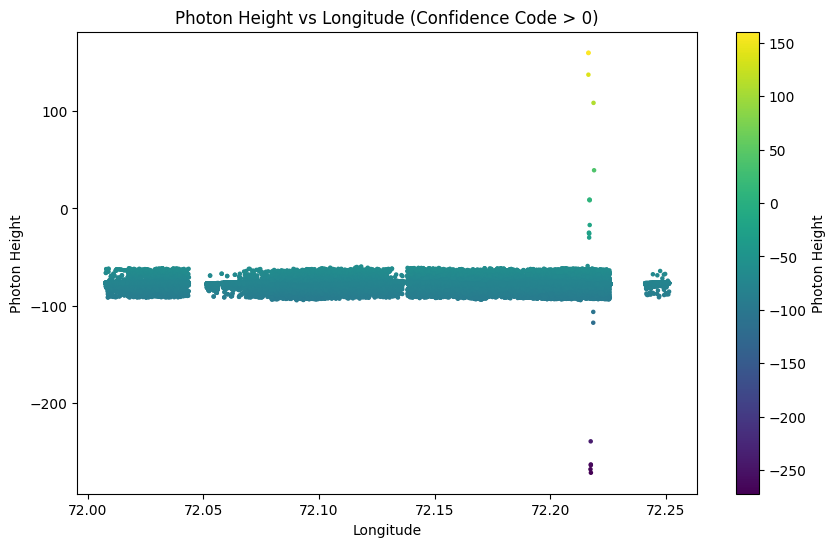

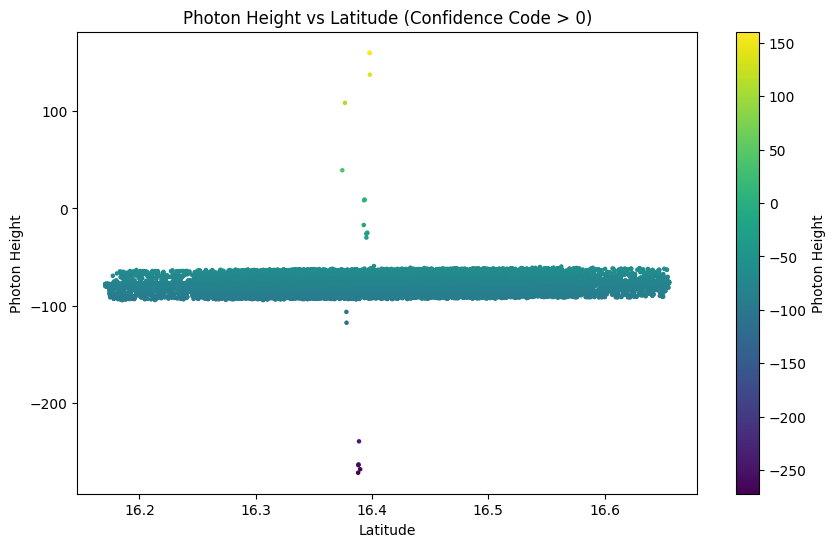

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
file_path = r"C:\Users\Lenovo\CSIR NIO\combined_filtered_data.csv"
data = pd.read_csv(file_path)

# Filter points where confidence code > 0
filtered_data = data[data["confidence code"] > 0]

# Extract relevant columns
latitude = filtered_data["latitude"]
longitude = filtered_data["longitude"]
photon_height = filtered_data["photon height"]

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(latitude, longitude, photon_height, c=photon_height, cmap='viridis', s=5)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Photon Height")
ax.set_title("3D Scatter Plot of Points with Confidence Code > 0")
plt.colorbar(scatter, ax=ax, label="Photon Height")
plt.show()

# Photon Height vs Longitude
plt.figure(figsize=(10, 6))
plt.scatter(longitude, photon_height, c=photon_height, cmap='viridis', s=5)
plt.xlabel("Longitude")
plt.ylabel("Photon Height")
plt.title("Photon Height vs Longitude (Confidence Code > 0)")
plt.colorbar(label="Photon Height")
plt.show()

# Photon Height vs Latitude
plt.figure(figsize=(10, 6))
plt.scatter(latitude, photon_height, c=photon_height, cmap='viridis', s=5)
plt.xlabel("Latitude")
plt.ylabel("Photon Height")
plt.title("Photon Height vs Latitude (Confidence Code > 0)")
plt.colorbar(label="Photon Height")
plt.show()


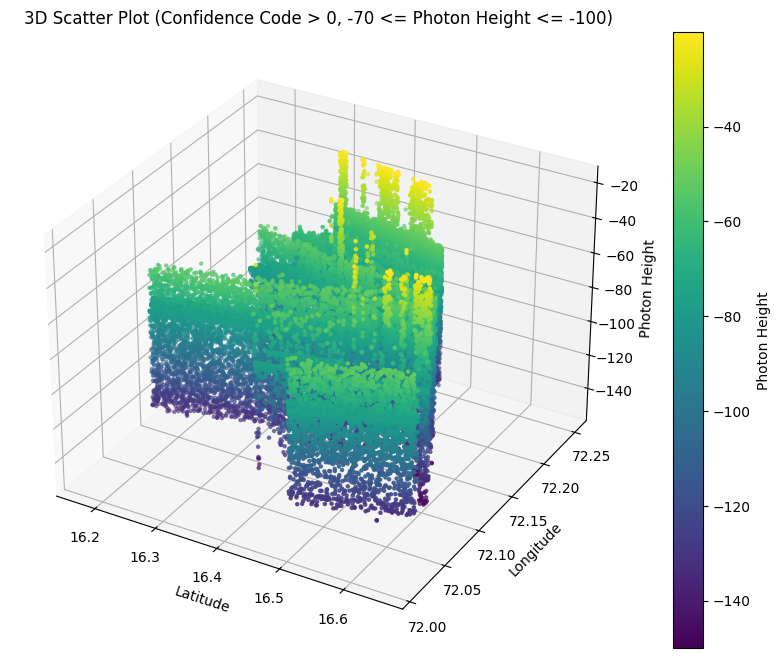

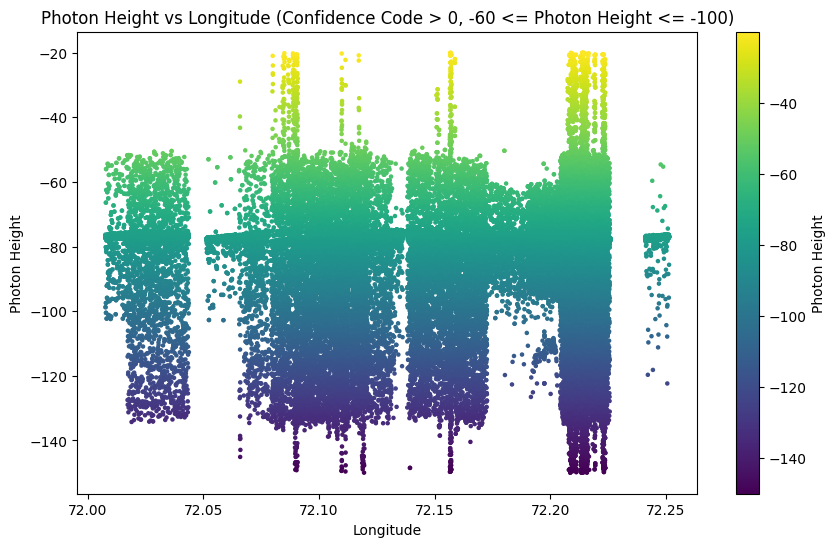

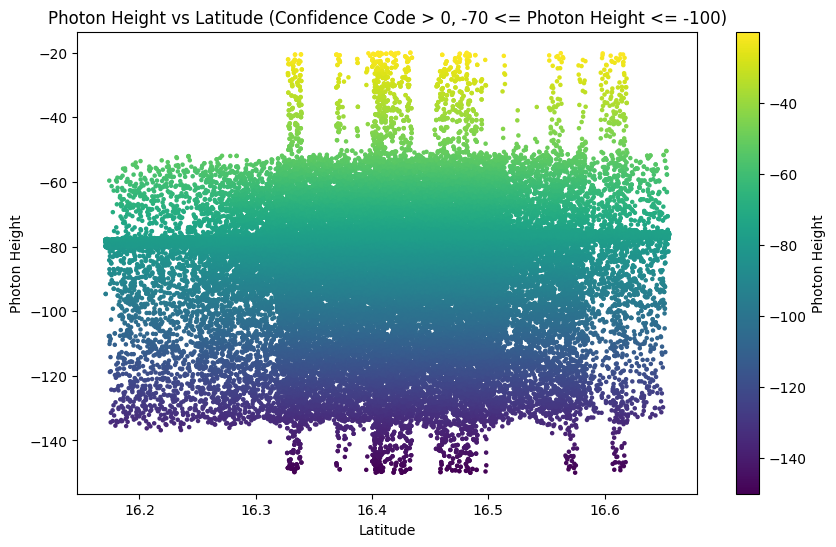

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
file_path = r"C:\Users\Lenovo\CSIR NIO\combined_filtered_data.csv"
data = pd.read_csv(file_path)

# Filter points where confidence code > 0 and -70 <= photon height <= -100
filtered_data = data[(data["confidence code"] > -1) & 
                     (data["photon height"] >= -150) & 
                     (data["photon height"] <= -20)]

# Extract relevant columns
latitude = filtered_data["latitude"]
longitude = filtered_data["longitude"]
photon_height = filtered_data["photon height"]

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(latitude, longitude, photon_height, c=photon_height, cmap='viridis', s=5)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Photon Height")
ax.set_title("3D Scatter Plot (Confidence Code > 0, -70 <= Photon Height <= -100)")
plt.colorbar(scatter, ax=ax, label="Photon Height")
plt.show()

# Photon Height vs Longitude
plt.figure(figsize=(10, 6))
plt.scatter(longitude, photon_height, c=photon_height, cmap='viridis', s=5)
plt.xlabel("Longitude")
plt.ylabel("Photon Height")
plt.title("Photon Height vs Longitude (Confidence Code > 0, -60 <= Photon Height <= -100)")
plt.colorbar(label="Photon Height")
plt.show()

# Photon Height vs Latitude
plt.figure(figsize=(10, 6))
plt.scatter(latitude, photon_height, c=photon_height, cmap='viridis', s=5)
plt.xlabel("Latitude")
plt.ylabel("Photon Height")
plt.title("Photon Height vs Latitude (Confidence Code > 0, -70 <= Photon Height <= -100)")
plt.colorbar(label="Photon Height")
plt.show()


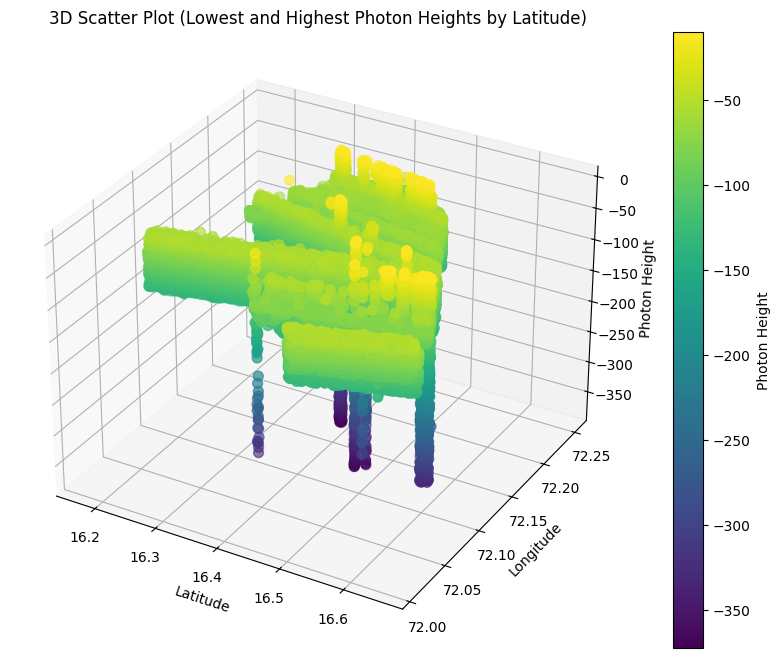

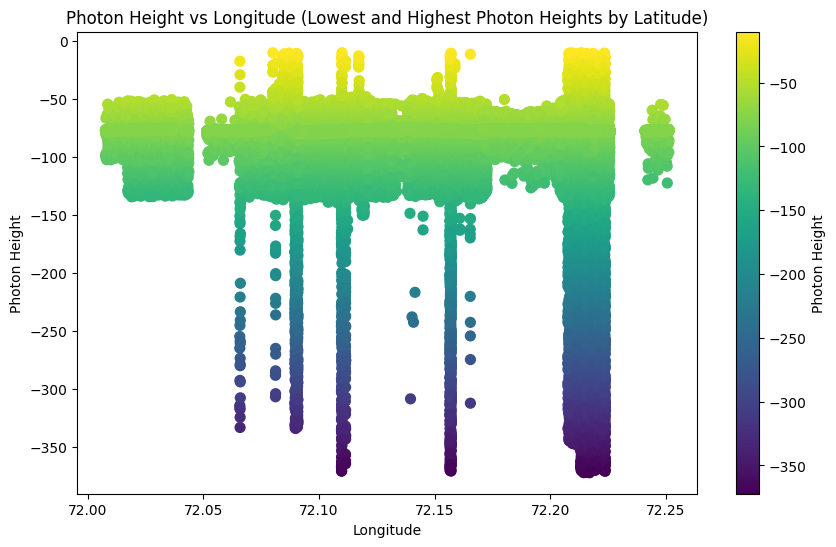

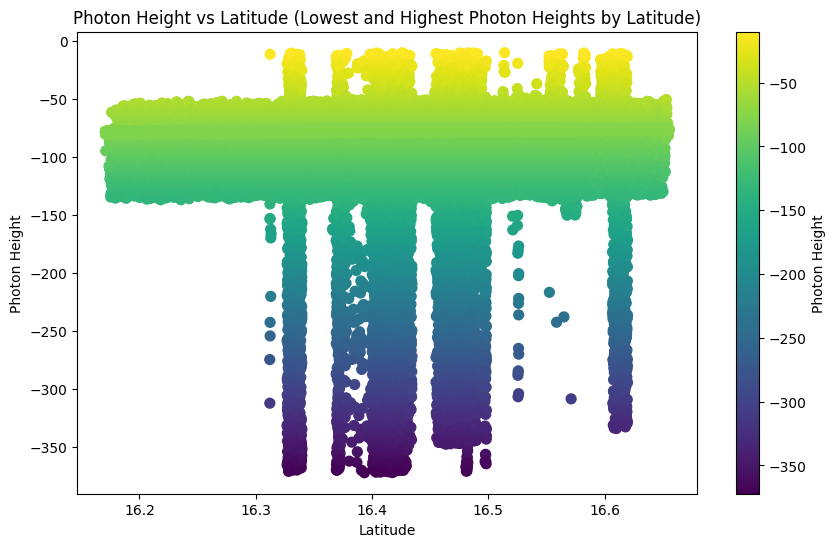

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
file_path = r"C:\Users\Lenovo\CSIR NIO\combined_filtered_data.csv"
data = pd.read_csv(file_path)

# Filter data for photon height between -70 and -100
filtered_data = data[(data["photon height"] >= -1000) & 
                     (data["photon height"] <= -10)]

# Get the lowest photon height for each latitude where confidence > 0
lowest_points = (
    filtered_data[filtered_data["confidence code"] > -1]
    .sort_values("photon height")
    .groupby("latitude", as_index=False)
    .first()
)

# Get the highest photon height for each latitude where confidence == 4
highest_points = (
    filtered_data[filtered_data["confidence code"] == 4]
    .sort_values("photon height", ascending=False)
    .groupby("latitude", as_index=False)
    .first()
)

# Combine lowest and highest points
combined_data = pd.concat([lowest_points, highest_points])

# Extract relevant columns
latitude = combined_data["latitude"]
longitude = combined_data["longitude"]
photon_height = combined_data["photon height"]

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(latitude, longitude, photon_height, c=photon_height, cmap='viridis', s=50)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Photon Height")
ax.set_title("3D Scatter Plot (Lowest and Highest Photon Heights by Latitude)")
plt.colorbar(scatter, ax=ax, label="Photon Height")
plt.show()

# Photon Height vs Longitude
plt.figure(figsize=(10, 6))
plt.scatter(longitude, photon_height, c=photon_height, cmap='viridis', s=50)
plt.xlabel("Longitude")
plt.ylabel("Photon Height")
plt.title("Photon Height vs Longitude (Lowest and Highest Photon Heights by Latitude)")
plt.colorbar(label="Photon Height")
plt.show()

# Photon Height vs Latitude
plt.figure(figsize=(10, 6))
plt.scatter(latitude, photon_height, c=photon_height, cmap='viridis', s=50)
plt.xlabel("Latitude")
plt.ylabel("Photon Height")
plt.title("Photon Height vs Latitude (Lowest and Highest Photon Heights by Latitude)")
plt.colorbar(label="Photon Height")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20424\3382883354.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat(all_data, ignore_index=True)


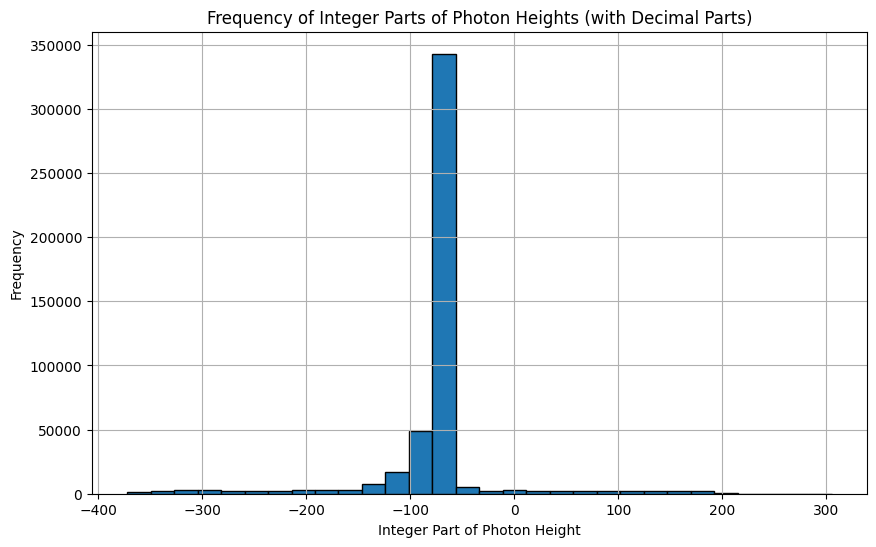

In [74]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the folder containing CSV files and GeoJSON
folder_path = r"C:\Users\Lenovo\CSIR NIO"
shapefile_path = r"C:\Users\Lenovo\CSIR NIO\final plateu.geojson"

# Read the GeoJSON file
geojson_data = gpd.read_file(shapefile_path)

# Function to filter CSV files and process the data
def process_and_filter_csv(folder_path, geojson_data):
    all_data = []

    # Loop through each CSV file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            
            # Convert the DataFrame to GeoDataFrame for spatial filtering
            gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']), crs="EPSG:4326")
            
            # Use 'union_all' instead of 'unary_union' to avoid deprecation warning
            points_in_geojson = gdf[gdf.geometry.within(geojson_data.geometry.union_all())]
            
            # Append the filtered data
            all_data.append(points_in_geojson)

    # Combine all the filtered data into one DataFrame
    combined_data = pd.concat(all_data, ignore_index=True)
    
    return combined_data

# Get the filtered data
filtered_data = process_and_filter_csv(folder_path, geojson_data)

# Now filter photon heights that have decimal parts (non-integer)
filtered_data['photon height'] = pd.to_numeric(filtered_data['photon height'], errors='coerce')
filtered_data_filtered = filtered_data[filtered_data['photon height'].notnull()]
filtered_data_filtered = filtered_data_filtered[filtered_data_filtered['photon height'] != filtered_data_filtered['photon height'].astype(int)]

# Extract the integer part of the photon height (before the decimal)
filtered_data_filtered['integer_part'] = filtered_data_filtered['photon height'].apply(lambda x: int(str(x).split('.')[0]))

# Plotting the frequency of the integer parts of photon heights
plt.figure(figsize=(10, 6))
plt.hist(filtered_data_filtered['integer_part'], bins=30, edgecolor='black')
plt.title("Frequency of Integer Parts of Photon Heights (with Decimal Parts)")
plt.xlabel("Integer Part of Photon Height")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


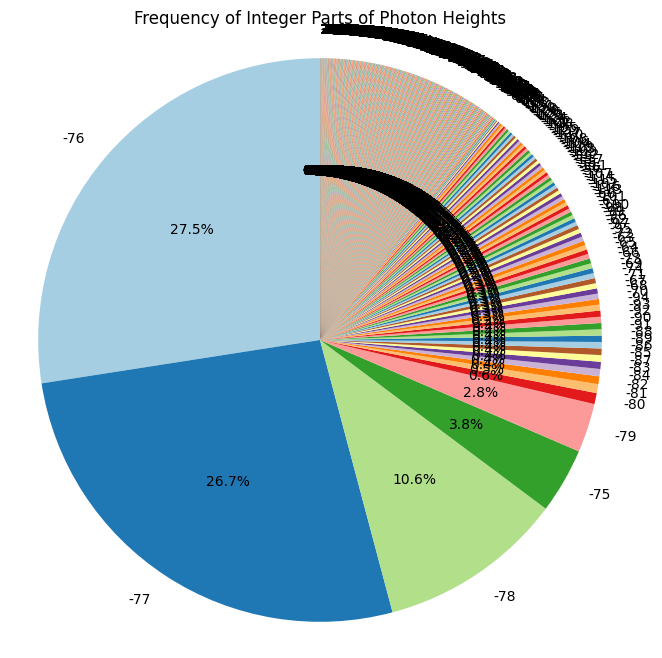

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the combined data file
combined_data_path = r"C:\Users\Lenovo\CSIR NIO\combined_filtered_data.csv"

# Load the combined filtered data
combined_data = pd.read_csv(combined_data_path)

# Ensure the photon height column is numeric
combined_data['photon height'] = pd.to_numeric(combined_data['photon height'], errors='coerce')

# Filter out rows where photon height is NaN or integer
filtered_data = combined_data[combined_data['photon height'].notnull()]
filtered_data = filtered_data[filtered_data['photon height'] != filtered_data['photon height'].astype(int)]

# Extract the integer part (before the decimal point)
filtered_data['integer_part'] = filtered_data['photon height'].apply(lambda x: int(str(x).split('.')[0]))

# Count the frequency of each integer part
integer_part_counts = filtered_data['integer_part'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(integer_part_counts, labels=integer_part_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Frequency of Integer Parts of Photon Heights")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


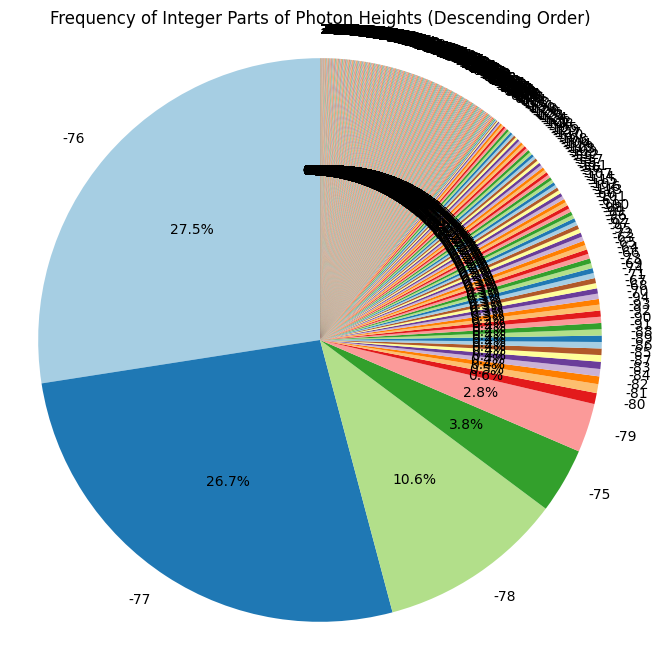

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the combined data file
combined_data_path = r"C:\Users\Lenovo\CSIR NIO\combined_filtered_data.csv"

# Load the combined filtered data
combined_data = pd.read_csv(combined_data_path)

# Ensure the photon height column is numeric
combined_data['photon height'] = pd.to_numeric(combined_data['photon height'], errors='coerce')

# Filter out rows where photon height is NaN or integer
filtered_data = combined_data[combined_data['photon height'].notnull()]
filtered_data = filtered_data[filtered_data['photon height'] != filtered_data['photon height'].astype(int)]

# Extract the integer part (before the decimal point)
filtered_data['integer_part'] = filtered_data['photon height'].apply(lambda x: int(str(x).split('.')[0]))

# Count the frequency of each integer part and sort in descending order
integer_part_counts = filtered_data['integer_part'].value_counts().sort_values(ascending=False)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(integer_part_counts, labels=integer_part_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Frequency of Integer Parts of Photon Heights (Descending Order)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [80]:
import pandas as pd

# Path to the combined data file
combined_data_path = r"C:\Users\Lenovo\CSIR NIO\combined_filtered_data.csv"

# Load the combined filtered data
combined_data = pd.read_csv(combined_data_path)

# Ensure the photon height column is numeric
combined_data['photon height'] = pd.to_numeric(combined_data['photon height'], errors='coerce')

# Filter out rows where photon height is NaN or integer
filtered_data = combined_data[combined_data['photon height'].notnull()]
filtered_data = filtered_data[filtered_data['photon height'] != filtered_data['photon height'].astype(int)]

# Extract the integer part (before the decimal point)
filtered_data['integer_part'] = filtered_data['photon height'].apply(lambda x: int(str(x).split('.')[0]))

# Count the frequency of each integer part and sort in descending order
integer_part_counts = filtered_data['integer_part'].value_counts().sort_values(ascending=False)

# Display the result as a list of integers and their frequencies
print("Integer Parts of Photon Heights and their Frequencies (Descending Order):")
print(integer_part_counts)


Integer Parts of Photon Heights and their Frequencies (Descending Order):
integer_part
-76     64452
-77     62626
-78     24973
-75      8802
-79      6598
        ...  
 219        2
 212        2
 214        2
 210        2
 216        1
Name: count, Length: 605, dtype: int64


In [82]:
import pandas as pd

# Path to the combined data file
combined_data_path = r"C:\Users\Lenovo\CSIR NIO\combined_filtered_data.csv"

# Load the combined filtered data
combined_data = pd.read_csv(combined_data_path)

# Ensure the photon height column is numeric
combined_data['photon height'] = pd.to_numeric(combined_data['photon height'], errors='coerce')

# Filter out rows where photon height is NaN or integer
filtered_data = combined_data[combined_data['photon height'].notnull()]
filtered_data = filtered_data[filtered_data['photon height'] != filtered_data['photon height'].astype(int)]

# Extract the integer part (before the decimal point)
filtered_data['integer_part'] = filtered_data['photon height'].apply(lambda x: int(str(x).split('.')[0]))

# Count the frequency of each integer part and sort in descending order
integer_part_counts = filtered_data['integer_part'].value_counts().sort_values(ascending=False)

# Display the result as a list of integers and their frequencies
print("Integer Parts of Photon Heights and their Frequencies (Descending Order):")
print(integer_part_counts.to_string())


Integer Parts of Photon Heights and their Frequencies (Descending Order):
integer_part
-76     64452
-77     62626
-78     24973
-75      8802
-79      6598
-80      1485
-81      1199
-82      1044
-84       985
-83       965
-87       885
-85       881
-86       861
-89       859
-88       840
-91       834
-90       831
-92       824
-93       789
-94       758
-70       722
-68       705
-67       698
-71       689
-74       688
-69       674
-73       663
-66       658
-64       641
-65       616
-63       615
-72       609
-95       593
-97       557
-62       548
-96       542
-99       501
-98       494
-100      492
-61       486
-101      481
-60       479
-113      476
-116      461
-102      457
-115      453
-114      453
-107      429
-57       414
-56       413
-111      412
-58       409
-117      406
-59       406
-112      401
-109      396
-103      389
-119      388
-104      387
-106      374
-108      373
-55       368
-110      364
-127      364
-129      351
-10

Matrix Shape: (36, 1025, 11251)

Matrix Dimensions: 3

First Slice (Slice 0):
 [[ -7.679061   -2.900097   -2.627634  ...  -2.409874   -2.7864761
   -8.214733 ]
 [ -9.402079   -7.0926666  -9.312067  ...  -8.220249   -7.005766
  -10.053875 ]
 [-14.69342   -19.861544  -28.07417   ... -28.157005  -24.000463
  -15.804815 ]
 ...
 [-68.441925  -73.26261   -80.        ... -80.        -75.04303
  -71.2056   ]
 [-68.83685   -74.49067   -80.        ... -80.        -75.02647
  -71.40779  ]
 [-69.41884   -77.751     -80.        ... -80.        -80.
  -72.481155 ]]


IndexError: index 4 is out of bounds for axis 0 with size 4

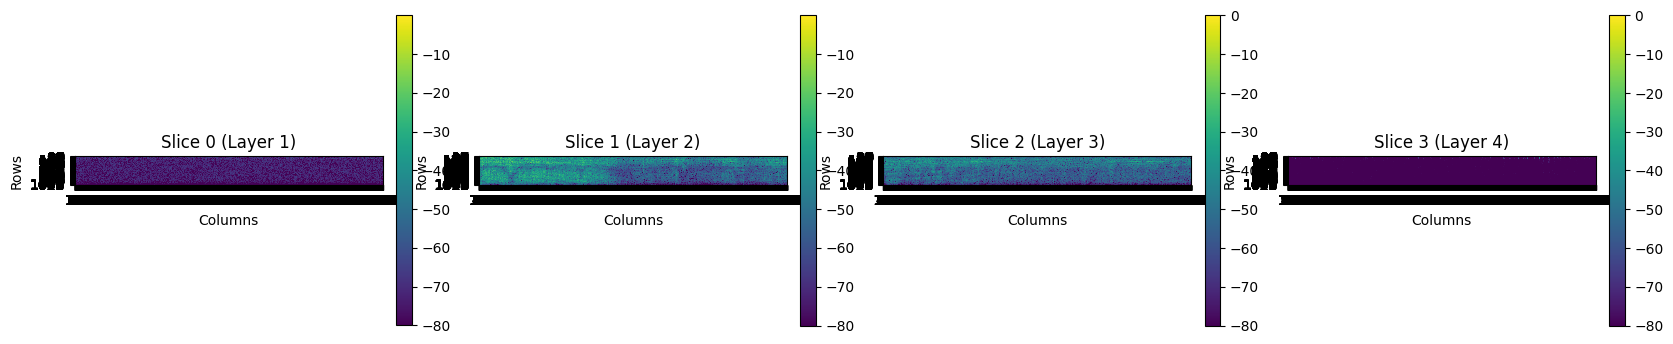

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load or create a 4x4x4 matrix
matrix_4x4x4 = np.load('D:/matrix.npy')  # Replace with your actual matrix if needed

# Display matrix structure
print("Matrix Shape:", matrix_4x4x4.shape)
print("\nMatrix Dimensions:", matrix_4x4x4.ndim)
print("\nFirst Slice (Slice 0):\n", matrix_4x4x4[0])

# Annotated Sample Visualization
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for slice_idx in range(matrix_4x4x4.shape[0]):
    ax = axes[slice_idx]
    cax = ax.imshow(matrix_4x4x4[slice_idx], cmap="viridis", interpolation="nearest")
    ax.set_title(f"Slice {slice_idx} (Layer {slice_idx+1})")
    ax.set_xlabel("Columns")
    ax.set_ylabel("Rows")
    ax.set_xticks(range(matrix_4x4x4.shape[2]))
    ax.set_yticks(range(matrix_4x4x4.shape[1]))
    plt.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# Summary of structure
for slice_idx in range(matrix_4x4x4.shape[0]):
    print(f"\nSlice {slice_idx} (Layer {slice_idx+1}):\n", matrix_4x4x4[slice_idx])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load or create a 4x4x4 matrix
matrix_4x4x4 = np.load('D:/matrix.npy')  # Replace with your actual matrix file path

# Define names for rows, columns, and slices
row_names = ["Row A", "Row B", "Row C", "Row D"]
col_names = ["Col 1", "Col 2", "Col 3", "Col 4"]
slice_names = ["Slice Alpha", "Slice Beta", "Slice Gamma", "Slice Delta"]

# Display matrix structure
print("Matrix Shape:", matrix_4x4x4.shape)
print("\nMatrix Dimensions:", matrix_4x4x4.ndim)
print("\nMatrix Slices with Names:")

# Print each slice with labeled rows and columns
for i, slice_name in enumerate(slice_names):
    print(f"\n{slice_name}:\n")
    print("   " + "  ".join(col_names))
    for row_name, row_data in zip(row_names, matrix_4x4x4[i]):
        print(row_name, row_data)

# Annotated Visualization
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for slice_idx in range(matrix_4x4x4.shape[0]):
    ax = axes[slice_idx]
    cax = ax.imshow(matrix_4x4x4[slice_idx], cmap="viridis", interpolation="nearest")
    ax.set_title(f"{slice_names[slice_idx]} (Layer {slice_idx+1})")
    ax.set_xlabel("Columns")
    ax.set_ylabel("Rows")
    ax.set_xticks(range(matrix_4x4x4.shape[2]))
    ax.set_xticklabels(col_names)
    ax.set_yticks(range(matrix_4x4x4.shape[1]))
    ax.set_yticklabels(row_names)
    plt.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from tqdm import tqdm  # For progress bars

# Simulate loading process with a progress bar
print("Loading matrix data...")
for _ in tqdm(range(10), desc="Processing"):
    sleep(0.1)  # Simulates processing/loading time

# Load or create a 4x4x4 matrix
matrix_4x4x4 = np.load('D:/matrix.npy')  # Replace with your actual matrix file path

# Define names for rows, columns, and slices
row_names = ["Row A", "Row B", "Row C", "Row D"]
col_names = ["Col 1", "Col 2", "Col 3", "Col 4"]
slice_names = ["Slice Alpha", "Slice Beta", "Slice Gamma", "Slice Delta"]

# Display matrix structure
print("\nMatrix Loaded!")
print("Matrix Shape:", matrix_4x4x4.shape)
print("\nMatrix Dimensions:", matrix_4x4x4.ndim)
print("\nMatrix Slices with Names:")

# Print each slice with labeled rows and columns
for i, slice_name in enumerate(slice_names):
    print(f"\n{slice_name}:\n")
    print("   " + "  ".join(col_names))
    for row_name, row_data in zip(row_names, matrix_4x4x4[i]):
        print(row_name, row_data)

# Simulate loading visualization with a progress bar
print("\nGenerating visualizations...")
for _ in tqdm(range(10), desc="Rendering"):
    sleep(0.1)  # Simulates rendering time

# Annotated Visualization
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for slice_idx in range(matrix_4x4x4.shape[0]):
    ax = axes[slice_idx]
    cax = ax.imshow(matrix_4x4x4[slice_idx], cmap="viridis", interpolation="nearest")
    ax.set_title(f"{slice_names[slice_idx]} (Layer {slice_idx+1})")
    ax.set_xlabel("Columns")
    ax.set_ylabel("Rows")
    ax.set_xticks(range(matrix_4x4x4.shape[2]))
    ax.set_xticklabels(col_names)
    ax.set_yticks(range(matrix_4x4x4.shape[1]))
    ax.set_yticklabels(row_names)
    plt.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


In [3]:
import geojson

# Load your GeoJSON file
with open(r'C:\Users\Lenovo\CSIR NIO\dwarka\dwarka.geojson', 'r') as file:

    geojson_data = geojson.load(file)

# Function to recursively extract coordinates from GeoJSON
def extract_coordinates(geojson_obj):
    coordinates = []

    # Check if the type is a GeometryCollection
    if geojson_obj['type'] == 'FeatureCollection':
        for feature in geojson_obj['features']:
            coordinates.extend(extract_coordinates(feature['geometry']))

    elif geojson_obj['type'] == 'Feature':
        coordinates.extend(extract_coordinates(geojson_obj['geometry']))

    elif geojson_obj['type'] == 'GeometryCollection':
        for geom in geojson_obj['geometries']:
            coordinates.extend(extract_coordinates(geom))

    elif geojson_obj['type'] in ['Point', 'LineString', 'Polygon']:
        coordinates.append(geojson_obj['coordinates'])

    return coordinates

# Extract coordinates from the GeoJSON
coordinates = extract_coordinates(geojson_data)

# Print extracted coordinates
for coord in coordinates:
    print(coord)


[[[68.952073, 22.236373, 0.0], [68.969809, 22.219448, 0.0], [68.972581, 22.224631, 0.0], [68.970876, 22.227688, 0.0], [68.965266, 22.234985, 0.0], [68.960157, 22.238102, 0.0], [68.95819, 22.237555, 0.0], [68.956945, 22.239379, 0.0], [68.952073, 22.236373, 0.0]]]
